In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pd.read_csv("csvs/hog_95/extracted_features_hog_95.csv",header =None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3239,3240,3241,3242,3243,3244,3245,3246,3247,3248
0,Rachel_Leigh_Cook,0.101289,1.330157,-0.964354,0.278769,-0.543510,1.725658,-0.641089,-0.416891,-0.197742,...,52.0,689.0,2015.0,543.0,19.0,301.0,450.0,355.0,289.0,11011.0
1,Roseanne_Barr,0.391125,0.704784,1.217563,-0.780129,-1.414380,0.959051,1.196409,1.637598,0.144761,...,44.0,654.0,1721.0,548.0,26.0,416.0,510.0,451.0,378.0,7875.0
2,Vladimir_Putin,-1.246895,-0.680080,0.591671,-2.354134,-1.920589,-0.013368,0.060721,-0.179192,1.438939,...,35.0,504.0,3792.0,564.0,27.0,420.0,679.0,460.0,611.0,17388.0
3,Carlos_Menem,0.597257,-0.661087,1.356273,-0.878202,-0.588220,-0.435263,-0.077499,-0.152108,0.537329,...,53.0,495.0,1593.0,566.0,34.0,343.0,563.0,399.0,338.0,9557.0
4,Lynne_Thigpen,-1.589231,-0.049223,-1.306154,-0.461846,0.250779,-2.198609,-0.026885,0.607296,-0.321626,...,39.0,520.0,1744.0,502.0,24.0,339.0,531.0,398.0,394.0,14844.0


In [3]:
df_test = pd.read_csv("csvs/hog_95/extracted_features_test_hog_95.csv",header=None)
df = pd.concat([df,df_test],axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13233 entries, 0 to 2646
Columns: 3249 entries, 0 to 3248
dtypes: float64(3248), object(1)
memory usage: 328.1+ MB


In [4]:
#min number of samples per class to be 50
df_modified_50 = df[df[0].map(df[0].value_counts()) >= 50]
df_modified_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1560 entries, 6 to 2641
Columns: 3249 entries, 0 to 3248
dtypes: float64(3248), object(1)
memory usage: 38.7+ MB


In [5]:
df_modified_50[0].unique().shape

(12,)

In [6]:

Features = df_modified_50.drop(0,axis = 1)
print(Features.shape)
target = df_modified_50[0]
print(target.shape)

(1560, 3248)
(1560,)


In [7]:
Features_all=Features.loc[:,:]
Features_HoG_95 = Features.loc[:,:946]
Features_CNN = Features.loc[:,946:2993]
Features_LBP = Features.loc[:,2993:]

In [8]:
print("No of CNN features: ",Features_CNN.shape[1])
print("No of HoG features covering 0.95 variance: ",Features_HoG_95.shape[1])
print("No of LBP Features are: ",Features_LBP.shape[1])

No of CNN features:  2048
No of HoG features covering 0.95 variance:  946
No of LBP Features are:  256


Training using HoG Features

In [9]:
X_train_HoG,X_test_HoG,y_train_HoG,y_test_HoG = train_test_split(Features_HoG_95,target,train_size=0.8,random_state=42)

In [10]:
#normalising data
scaler=StandardScaler()
X_train_arr=X_train_HoG.values
X_test_arr=X_test_HoG.values
X_train_arr_n=scaler.fit_transform(X_train_arr)
X_test_arr_n = scaler.transform(X_test_arr)
X_train_HoG = pd.DataFrame(X_train_arr_n)
X_test_HoG = pd.DataFrame(X_test_arr_n)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier object and training data
knn = KNeighborsClassifier()
knn.fit(X_train_HoG, y_train_HoG)




KNeighborsClassifier()

In [12]:
# Predicting the target labels for the test data
y_pred = knn.predict(X_test_HoG)

In [15]:
#calculating accuracy
accuracy = accuracy_score(y_test_HoG, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.3942307692307692


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initializing variables to store the maximum accuracy and the corresponding hyperparameters
max_accuracy = 0
best_distance_metric = None
best_k = None

# Defining different distance metrics and k values 
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
k_values = range(1, 21)

# Converting distance metrics to numerical values for plotting
distance_metric_mapping = {'euclidean': 0, 'manhattan': 1, 'chebyshev': 2}

# Lists to store data for plotting
k_values_plot = []
distance_metric_plot = []
accuracy_plot = []

# Iterating over each combination of distance metric and k value
for distance_metric in distance_metrics:
    for k in k_values:
        # creating knn classifier
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
        
        # Training
        knn.fit(X_train_HoG, y_train_HoG)
        
        # Prediction
        y_pred = knn.predict(X_test_HoG)
        
        # Calculating the accuracy of the model
        accuracy = accuracy_score(y_test_HoG, y_pred)
        
        # Appending data for plotting
        k_values_plot.append(k)
        distance_metric_plot.append(distance_metric_mapping[distance_metric])
        accuracy_plot.append(accuracy)
        
        # block for finding max accuracy
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_distance_metric = distance_metric
            best_k = k

# Print the hyperparameters with the maximum accuracy
print("Best distance metric:", best_distance_metric)
print("Best k value:", best_k)
print("Maximum accuracy:", max_accuracy)

Best distance metric: euclidean
Best k value: 11
Maximum accuracy: 0.48717948717948717


In [45]:
from sklearn.metrics import euclidean_distances

# Define a custom distance function that calculates squared Euclidean distance
def sqeuclidean(x, y):
    return euclidean_distances([x], [y])[0] ** 2
knn = KNeighborsClassifier(n_neighbors=11, metric=sqeuclidean)
knn.fit(X_train_HoG, y_train_HoG)
y_pred = knn.predict(X_test_HoG)
joblib.dump( knn,'hog_knn.joblib')

['hog_knn.joblib']

C:\Users\AVANI RAI\AppData\Local\Temp\ipykernel_1212\4051670908.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([distance_metric_labels[int(tick)] for tick in ax.get_yticks()])


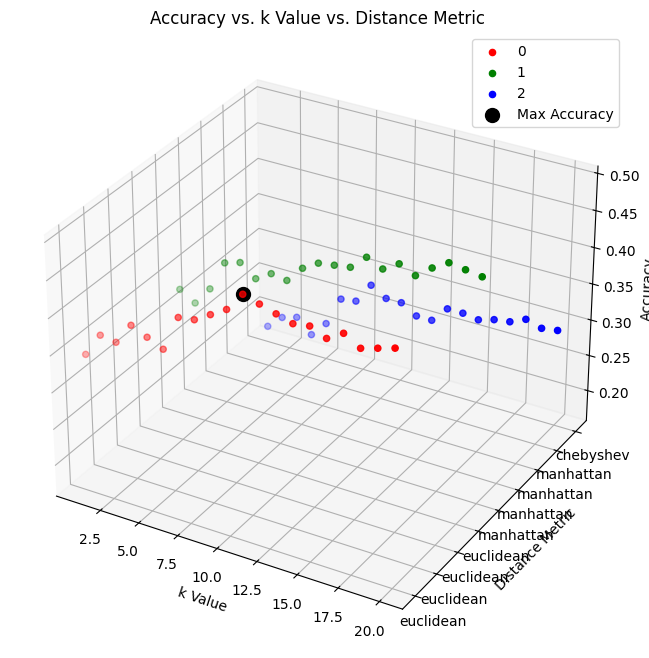

In [17]:
# Plotting the 3D graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each distance metric
colors = ['r', 'g', 'b']

# Plotting the data points for each distance metric
for metric, color in zip(distance_metric_mapping.values(), colors):
    indices = np.where(np.array(distance_metric_plot) == metric)
    ax.scatter(np.array(k_values_plot)[indices], np.array(distance_metric_plot)[indices], np.array(accuracy_plot)[indices], c=color, marker='o', label=metric)

# Highlighting the point with the maximum accuracy
max_accuracy_index = accuracy_plot.index(max_accuracy)
ax.scatter(k_values_plot[max_accuracy_index], distance_metric_plot[max_accuracy_index], accuracy_plot[max_accuracy_index], c='k', marker='o', s=100, label='Max Accuracy')

# Setting labels for axes
ax.set_xlabel('k Value')
ax.set_ylabel('Distance Metric')
ax.set_zlabel('Accuracy')
ax.set_title('Accuracy vs. k Value vs. Distance Metric')

# Reversing the mapping for distance metrics to show the correct labels
distance_metric_labels = {v: k for k, v in distance_metric_mapping.items()}
ax.set_yticklabels([distance_metric_labels[int(tick)] for tick in ax.get_yticks()])

# Show legend
ax.legend()

plt.show()


Training using CNN Features

In [18]:
X_train_CNN,X_test_CNN,y_train_CNN,y_test_CNN = train_test_split(Features_CNN,target,train_size=0.8,random_state=42)

In [19]:
#normalising data
scaler=StandardScaler()
X_train_arr=X_train_CNN.values
X_test_arr=X_test_CNN.values
X_train_arr_n=scaler.fit_transform(X_train_arr)
X_test_arr_n = scaler.transform(X_test_arr)
X_train_CNN = pd.DataFrame(X_train_arr_n)
X_test_CNN = pd.DataFrame(X_test_arr_n)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier object and training data
knn = KNeighborsClassifier()
knn.fit(X_train_CNN, y_train_CNN)


KNeighborsClassifier()

In [21]:
# Predicting the target labels for the test data
y_pred = knn.predict(X_test_CNN)

In [22]:
#calculating accuracy
accuracy = accuracy_score(y_test_CNN, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.46474358974358976


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initializing variables to store the maximum accuracy and the corresponding hyperparameters
max_accuracy = 0
best_distance_metric = None
best_k = None

# Defining different distance metrics and k values 
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
k_values = range(1, 21)

# Converting distance metrics to numerical values for plotting
distance_metric_mapping = {'euclidean': 0, 'manhattan': 1, 'chebyshev': 2}

# Lists to store data for plotting
k_values_plot = []
distance_metric_plot = []
accuracy_plot = []

# Iterating over each combination of distance metric and k value
for distance_metric in distance_metrics:
    for k in k_values:
        # creating knn classifier
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
        
        # Training
        knn.fit(X_train_CNN, y_train_CNN)
        
        # Prediction
        y_pred_CNN = knn.predict(X_test_CNN)
        
        # Calculating the accuracy of the model
        accuracy = accuracy_score(y_test_CNN, y_pred_CNN)
        
        # Appending data for plotting
        k_values_plot.append(k)
        distance_metric_plot.append(distance_metric_mapping[distance_metric])
        accuracy_plot.append(accuracy)
        
        # block for finding max accuracy
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_distance_metric = distance_metric
            best_k = k

# Print the hyperparameters with the maximum accuracy
print("Best distance metric:", best_distance_metric)
print("Best k value:", best_k)
print("Maximum accuracy:", max_accuracy)

Best distance metric: euclidean
Best k value: 12
Maximum accuracy: 0.47115384615384615


In [46]:
from sklearn.metrics import euclidean_distances

# Define a custom distance function that calculates squared Euclidean distance
def sqeuclidean(x, y):
    return euclidean_distances([x], [y])[0] ** 2
knn = KNeighborsClassifier(n_neighbors=12, metric=sqeuclidean)
knn.fit(X_train_CNN, y_train_CNN)
y_pred = knn.predict(X_test_CNN)
joblib.dump( knn,'cnn_knn.joblib')

['cnn_knn.joblib']

C:\Users\AVANI RAI\AppData\Local\Temp\ipykernel_1212\4051670908.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([distance_metric_labels[int(tick)] for tick in ax.get_yticks()])


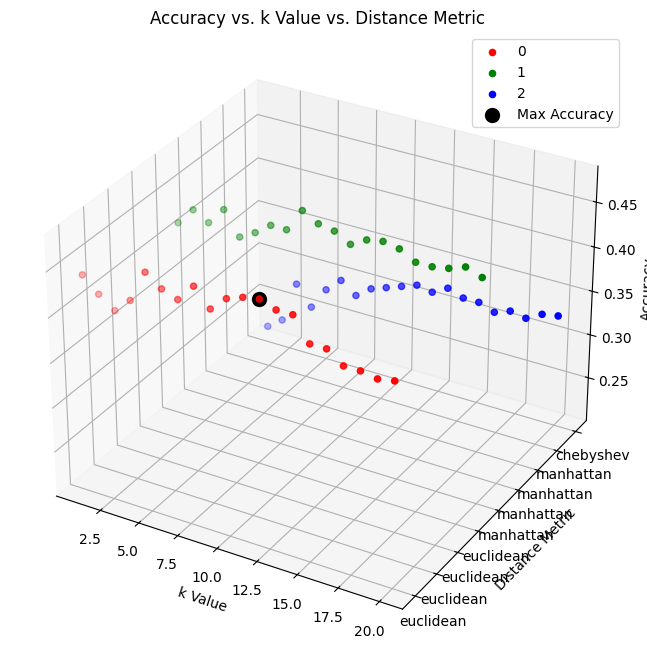

In [25]:
# Plotting the 3D graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each distance metric
colors = ['r', 'g', 'b']

# Plotting the data points for each distance metric
for metric, color in zip(distance_metric_mapping.values(), colors):
    indices = np.where(np.array(distance_metric_plot) == metric)
    ax.scatter(np.array(k_values_plot)[indices], np.array(distance_metric_plot)[indices], np.array(accuracy_plot)[indices], c=color, marker='o', label=metric)

# Highlighting the point with the maximum accuracy
max_accuracy_index = accuracy_plot.index(max_accuracy)
ax.scatter(k_values_plot[max_accuracy_index], distance_metric_plot[max_accuracy_index], accuracy_plot[max_accuracy_index], c='k', marker='o', s=100, label='Max Accuracy')

# Setting labels for axes
ax.set_xlabel('k Value')
ax.set_ylabel('Distance Metric')
ax.set_zlabel('Accuracy')
ax.set_title('Accuracy vs. k Value vs. Distance Metric')

# Reversing the mapping for distance metrics to show the correct labels
distance_metric_labels = {v: k for k, v in distance_metric_mapping.items()}
ax.set_yticklabels([distance_metric_labels[int(tick)] for tick in ax.get_yticks()])

# Show legend
ax.legend()

plt.show()


Training using LBP features

In [26]:
X_train_LBP,X_test_LBP,y_train_LBP,y_test_LBP = train_test_split(Features_LBP,target,train_size=0.8,random_state=42)

In [27]:
#normalising data
scaler=StandardScaler()
X_train_arr=X_train_LBP.values
X_test_arr=X_test_LBP.values
X_train_arr_n=scaler.fit_transform(X_train_arr)
X_test_arr_n = scaler.transform(X_test_arr)
X_train_LBP = pd.DataFrame(X_train_arr_n)
X_test_LBP = pd.DataFrame(X_test_arr_n)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier object and training data
knn = KNeighborsClassifier()
knn.fit(X_train_LBP, y_train_LBP)


KNeighborsClassifier()

In [29]:
# Predicting the target labels for the test data
y_pred_LBP = knn.predict(X_test_LBP)

In [30]:
#calculating accuracy
accuracy = accuracy_score(y_test_LBP, y_pred_LBP)

print("Accuracy:", accuracy)


Accuracy: 0.2564102564102564


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initializing variables to store the maximum accuracy and the corresponding hyperparameters
max_accuracy = 0
best_distance_metric = None
best_k = None

# Defining different distance metrics and k values 
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
k_values = range(1, 21)

# Converting distance metrics to numerical values for plotting
distance_metric_mapping = {'euclidean': 0, 'manhattan': 1, 'chebyshev': 2}

# Lists to store data for plotting
k_values_plot = []
distance_metric_plot = []
accuracy_plot = []

# Iterating over each combination of distance metric and k value
for distance_metric in distance_metrics:
    for k in k_values:
        # creating knn classifier
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
        
        # Training
        knn.fit(X_train_LBP, y_train_LBP)
        
        # Prediction
        y_pred_LBP = knn.predict(X_test_LBP)
        
        # Calculating the accuracy of the model
        accuracy = accuracy_score(y_test_LBP, y_pred_LBP)
        
        # Appending data for plotting
        k_values_plot.append(k)
        distance_metric_plot.append(distance_metric_mapping[distance_metric])
        accuracy_plot.append(accuracy)
        
        # block for finding max accuracy
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_distance_metric = distance_metric
            best_k = k

# Print the hyperparameters with the maximum accuracy
print("Best distance metric:", best_distance_metric)
print("Best k value:", best_k)
print("Maximum accuracy:", max_accuracy)

Best distance metric: manhattan
Best k value: 18
Maximum accuracy: 0.32051282051282054


In [47]:
from sklearn.metrics.pairwise import manhattan_distances

# Define a custom distance function that calculates squared Euclidean distance
def manhattan(x, y):
    return manhattan_distances([x], [y])[0]
knn = KNeighborsClassifier(n_neighbors=18, metric=manhattan)
knn.fit(X_train_LBP, y_train_LBP)
y_pred = knn.predict(X_test_LBP)
joblib.dump( knn,'lbp_knn.joblib')

['lbp_knn.joblib']

C:\Users\AVANI RAI\AppData\Local\Temp\ipykernel_1212\4051670908.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([distance_metric_labels[int(tick)] for tick in ax.get_yticks()])


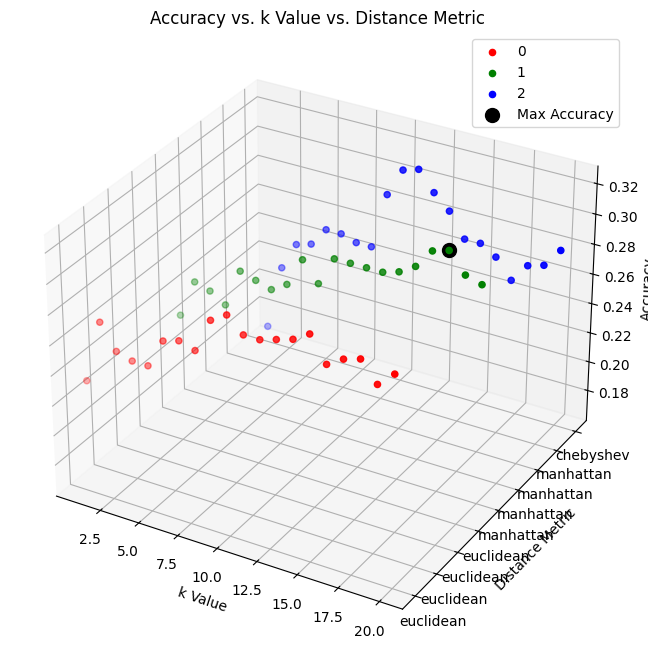

In [32]:
# Plotting the 3D graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each distance metric
colors = ['r', 'g', 'b']

# Plotting the data points for each distance metric
for metric, color in zip(distance_metric_mapping.values(), colors):
    indices = np.where(np.array(distance_metric_plot) == metric)
    ax.scatter(np.array(k_values_plot)[indices], np.array(distance_metric_plot)[indices], np.array(accuracy_plot)[indices], c=color, marker='o', label=metric)

# Highlighting the point with the maximum accuracy
max_accuracy_index = accuracy_plot.index(max_accuracy)
ax.scatter(k_values_plot[max_accuracy_index], distance_metric_plot[max_accuracy_index], accuracy_plot[max_accuracy_index], c='k', marker='o', s=100, label='Max Accuracy')

# Setting labels for axes
ax.set_xlabel('k Value')
ax.set_ylabel('Distance Metric')
ax.set_zlabel('Accuracy')
ax.set_title('Accuracy vs. k Value vs. Distance Metric')

# Reversing the mapping for distance metrics to show the correct labels
distance_metric_labels = {v: k for k, v in distance_metric_mapping.items()}
ax.set_yticklabels([distance_metric_labels[int(tick)] for tick in ax.get_yticks()])

# Show legend
ax.legend()

plt.show()


training for all the features

In [34]:
X_train_all,X_test_all,y_train_all,y_test_all = train_test_split(Features_all,target,train_size=0.8,random_state=42)

In [35]:
#normalising data
scaler=StandardScaler()
X_train_arr=X_train_all.values
X_test_arr=X_test_all.values
X_train_arr_n=scaler.fit_transform(X_train_arr)
X_test_arr_n = scaler.transform(X_test_arr)
X_train_all = pd.DataFrame(X_train_arr_n)
X_test_all = pd.DataFrame(X_test_arr_n)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier object and training data
knn = KNeighborsClassifier()
knn.fit(X_train_all, y_train_all)


KNeighborsClassifier()

In [37]:
# Predicting the target labels for the test data
y_pred_all = knn.predict(X_test_all)

In [38]:
#calculating accuracy
accuracy = accuracy_score(y_test_all, y_pred_all)

print("Accuracy:", accuracy)


Accuracy: 0.47435897435897434


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initializing variables to store the maximum accuracy and the corresponding hyperparameters
max_accuracy = 0
best_distance_metric = None
best_k = None

# Defining different distance metrics and k values 
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
k_values = range(1, 21)

# Converting distance metrics to numerical values for plotting
distance_metric_mapping = {'euclidean': 0, 'manhattan': 1, 'chebyshev': 2}

# Lists to store data for plotting
k_values_plot = []
distance_metric_plot = []
accuracy_plot = []

# Iterating over each combination of distance metric and k value
for distance_metric in distance_metrics:
    for k in k_values:
        # creating knn classifier
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
        
        # Training
        knn.fit(X_train_all, y_train_all)
        
        # Prediction
        y_pred_all = knn.predict(X_test_all)
        
        # Calculating the accuracy of the model
        accuracy = accuracy_score(y_test_all, y_pred_all)
        
        # Appending data for plotting
        k_values_plot.append(k)
        distance_metric_plot.append(distance_metric_mapping[distance_metric])
        accuracy_plot.append(accuracy)
        
        # block for finding max accuracy
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_distance_metric = distance_metric
            best_k = k

# Print the hyperparameters with the maximum accuracy
print("Best distance metric:", best_distance_metric)
print("Best k value:", best_k)
print("Maximum accuracy:", max_accuracy)

Best distance metric: manhattan
Best k value: 5
Maximum accuracy: 0.5256410256410257


In [48]:
from sklearn.metrics.pairwise import manhattan_distances

# manhattan distance
def manhattan(x, y):
    return manhattan_distances([x], [y])[0]
knn = KNeighborsClassifier(n_neighbors=5, metric=manhattan)
knn.fit(X_train_all, y_train_all)
y_pred = knn.predict(X_test_all)
joblib.dump( knn,'all_knn.joblib')

['all_knn.joblib']

C:\Users\AVANI RAI\AppData\Local\Temp\ipykernel_1212\4051670908.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([distance_metric_labels[int(tick)] for tick in ax.get_yticks()])


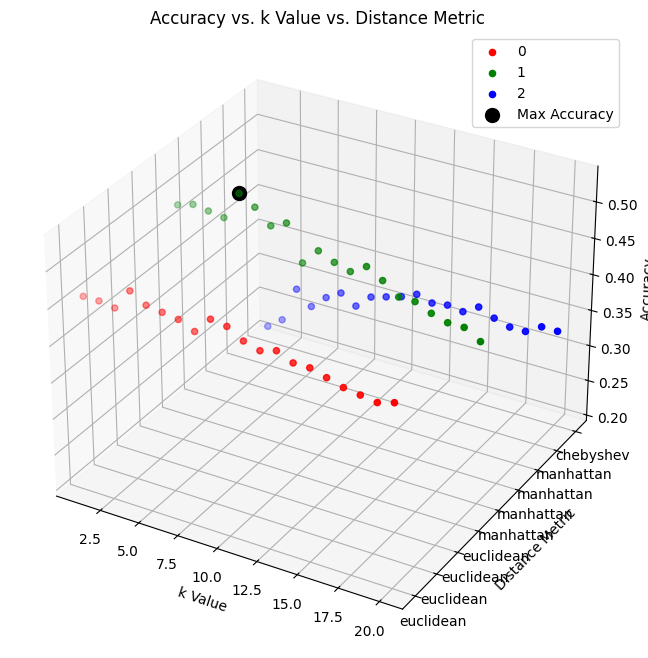

In [40]:
# Plotting the 3D graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each distance metric
colors = ['r', 'g', 'b']

# Plotting the data points for each distance metric
for metric, color in zip(distance_metric_mapping.values(), colors):
    indices = np.where(np.array(distance_metric_plot) == metric)
    ax.scatter(np.array(k_values_plot)[indices], np.array(distance_metric_plot)[indices], np.array(accuracy_plot)[indices], c=color, marker='o', label=metric)

# Highlighting the point with the maximum accuracy
max_accuracy_index = accuracy_plot.index(max_accuracy)
ax.scatter(k_values_plot[max_accuracy_index], distance_metric_plot[max_accuracy_index], accuracy_plot[max_accuracy_index], c='k', marker='o', s=100, label='Max Accuracy')

# Setting labels for axes
ax.set_xlabel('k Value')
ax.set_ylabel('Distance Metric')
ax.set_zlabel('Accuracy')
ax.set_title('Accuracy vs. k Value vs. Distance Metric')

# Reversing the mapping for distance metrics to show the correct labels
distance_metric_labels = {v: k for k, v in distance_metric_mapping.items()}
ax.set_yticklabels([distance_metric_labels[int(tick)] for tick in ax.get_yticks()])

# Show legend
ax.legend()

plt.show()
